In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 2.x

In [ ]:
import os
import sys
#import efficientnet.keras as efn 

# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score

# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np
import random as rn
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [ ]:
train_df1 = pd.read_csv('/content/gdrive/My Drive/tesisdatabase/trainLabels.csv')
train_df2 = pd.read_csv('/content/gdrive/My Drive/tesisdatabase/train.csv')
train_df3 = pd.read_csv('/content/gdrive/My Drive/tesisdatabase/a. IDRiD_Disease Grading_Training Labels.csv')
test_df3 = pd.read_csv('/content/gdrive/My Drive/tesisdatabase/b. IDRiD_Disease Grading_Testing Labels.csv')

In [ ]:
train1_df1 =train_df1[train_df1.image != '43862_left']
train1_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35125 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   35125 non-null  object
 1   level   35125 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 823.2+ KB


In [ ]:
train_df1.head(10)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


In [ ]:
train_df2.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
train_df3.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df3.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,4,0
1,IDRiD_002,4,1
2,IDRiD_003,4,0
3,IDRiD_004,4,0
4,IDRiD_005,4,1


In [ ]:
from numpy import load

x1 = load('/content/gdrive/My Drive/tesisdatabase/xaptos.npy')
x2 = load('/content/gdrive/My Drive/tesisdatabase/xtrainchf.npy')
x3_train = load('/content/gdrive/My Drive/tesisdatabase/xtrainidrid.npy')
x3_test = load('/content/gdrive/My Drive/tesisdatabase/xtestidrid.npy')

In [ ]:
print(x1.shape)
print(x2.shape)
print(x3_train.shape)
print(x3_test.shape)


(3662, 224, 224, 3)
(35125, 224, 224, 3)
(413, 224, 224, 3)
(103, 224, 224, 3)


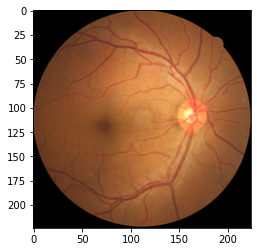

In [ ]:
plt.imshow(x2[9])

In [ ]:
y1 = pd.get_dummies(train_df2['diagnosis']).values
y2 = pd.get_dummies(train_df1['level']).values
y3_train = pd.get_dummies(train_df3['Retinopathy grade']).values
y3_test = pd.get_dummies(test_df3['Retinopathy grade']).values

In [ ]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   35126 non-null  object
 1   level   35126 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 549.0+ KB


In [ ]:
y2 = pd.get_dummies(train1_df1['level']).values

In [ ]:
print(y1.shape)
print(y2.shape)
print(y3_train.shape)
print(y3_test.shape)

(3662, 5)
(35125, 5)
(413, 5)
(103, 5)


In [ ]:
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
x1 = 0
x2 = 0
y1 = 0
y2 = 0

In [ ]:
print(x.shape)
print(y.shape)
print(y3_train.shape)
print(y3_test.shape)

(38787, 224, 224, 3)
(38787, 5)
(413, 5)
(103, 5)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x, y, 
    test_size=0.15, 
    random_state=2020
)
x = 0
y = 0

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(32968, 224, 224, 3)
(32968, 5)
(5819, 224, 224, 3)
(5819, 5)


In [ ]:
x_train1 = np.concatenate((x_train,x3_train))
y_train1 = np.concatenate((y_train,y3_train))
x_val1 = np.concatenate((x_val,x3_test))
y_val1 = np.concatenate((y_val,y3_test))
x_train = 0
x3_train = 0
x_val = 0
x3_test  = 0
y_train = 0
y3_train = 0
y_val = 0
y3_train = 0

In [ ]:
print(x_train1.shape)
print(y_train1.shape)
print(x_val1.shape)
print(y_val1.shape)

(33381, 224, 224, 3)
(33381, 5)
(5922, 224, 224, 3)
(5922, 5)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

In [ ]:
model1 = tf.keras.Sequential()

model1.add(Conv2D(64, (3, 3), padding='same', input_shape=(224,224,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(728, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(1024))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(5, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer= 'Adam',metrics=['accuracy'])

In [ ]:
x_val1.shape

(5922, 224, 224, 3)

In [ ]:
xval2=x_val1/255.

In [ ]:
x_train2=x_train1/255.

In [ ]:
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=True, 
                                   rescale=1 / 255.)

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1 / 255.)

tdata_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)
vdata_generator = test_datagen.flow(x_val1, y_val1, batch_size=BATCH_SIZE, seed=2020)

In [ ]:
model1.fit(x=x_train1, y=y_train1,batch_size=128, epochs=100, validation_data=(x_val1,y_val1),callbacks=[])

Epoch 1/100
261/261 [==============================] - 74s 285ms/step - loss: 0.3907 - accuracy: 0.8683 - val_loss: 1.8740 - val_accuracy: 0.6871
Epoch 2/100
261/261 [==============================] - 75s 286ms/step - loss: 0.3827 - accuracy: 0.8692 - val_loss: 1.9080 - val_accuracy: 0.6825
Epoch 3/100
261/261 [==============================] - 75s 286ms/step - loss: 0.3724 - accuracy: 0.8730 - val_loss: 1.9771 - val_accuracy: 0.6788
Epoch 4/100
261/261 [==============================] - 75s 286ms/step - loss: 0.3709 - accuracy: 0.8745 - val_loss: 2.0286 - val_accuracy: 0.6638
Epoch 5/100
261/261 [==============================] - 75s 285ms/step - loss: 0.3728 - accuracy: 0.8742 - val_loss: 2.0108 - val_accuracy: 0.6780
Epoch 6/100
261/261 [==============================] - 75s 286ms/step - loss: 0.3574 - accuracy: 0.8790 - val_loss: 2.1537 - val_accuracy: 0.6738
Epoch 7/100
261/261 [==============================] - 75s 286ms/step - loss: 0.3680 - accuracy: 0.8763 - val_loss: 1.7935 -